# Exploring the Relationship Between Precipitation and Flow Rate

## Reserach Question

How have precipitation patterns in Northwestern Oregon changed and what impact does this have on nearby surface runoff during flow events?

## Motivation

Many plastics enter the ocean through rivers that act as major conduits for land-based pollution which feed into ocean gyres—large-scale ocean current systems that trap floating plastics in specific areas. Hydrological studies can help track how precipitation, river discharge, surface water flow, and flooding events transport plastics from urban areas into the ocean.

Changing precipitation patterns and extreme weather events (e.g., hurricanes) can increase plastic transport from land to oceans.

# Uploading the Dataset

I have pulled data from the USGS for 2 stations that have at least a full decade of both surface discharge and precipitation readings. They are as follows:
1. USGS 14210000 CLACKAMAS RIVER AT ESTACADA, OR
2. USGS 14299800 NEHALEM RIVER NEAR VERNONIA, OR

Geographically these are in the same region of Oregon and the analysis of both should give more information about general trends in this area. Many other stations nearby only had precipitation data going back a between one to five years.

In [7]:
# Import pandas
import pandas as pd

First we import the data for the Clackamas river.

In [45]:
# Specify the filepath and create a dataframe
clack = "14210000.txt"
nehal = "14299800.txt"

# Read the file while skipping metadata (assume data starts after a certain number of lines)
df_c = pd.read_csv(clack, sep="\t", comment="#", skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], dtype=str)

# Drop the second row that contains column width information
df_c = df_c.iloc[1:].reset_index(drop=True)

# Convert numeric columns to appropriate data types
df_c.iloc[:, 3:] = df_c.iloc[:, 3:].apply(pd.to_numeric, errors='ignore')

# Convert Date column to datetime format
df_c["datetime"] = pd.to_datetime(df_c["datetime"], errors="coerce")

# Display the first few rows
df_c.head()

,agency_cd,site_no,datetime,114314_00060_00003,114314_00060_00003_cd,114315_00010_00001,114315_00010_00001_cd,114316_00010_00002,114316_00010_00002_cd,114317_00010_00003,...,332870_32321_00002,332870_32321_00002_cd,332871_32321_00003,332871_32321_00003_cd,332873_32315_00001,332873_32315_00001_cd,332874_32315_00002,332874_32315_00002_cd,332875_32315_00003,332875_32315_00003_cd
0,USGS,14210000,2010-10-01,902,A,13.1,A,12.8,A,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,14210000,2010-10-02,923,A,13.3,A,13.1,A,13.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,14210000,2010-10-03,950,A,13.4,A,13.2,A,13.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,14210000,2010-10-04,944,A,13.4,A,13.2,A,13.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,14210000,2010-10-05,883,A,13.2,A,13.0,A,13.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will select only the columns that we need and name them so they are easier to read.

In [48]:
# Save a new dataframe with only the columns that we want, namely the discharge and precipitation columns
selected_columns_c = ["datetime", "114314_00060_00003", "114330_00045_00006"]
filtered_df_c = df_c[selected_columns_c]

# Rename the columns
new_names_c = {"datetime":"Date", "114314_00060_00003":"Discharge (ft3/s)", "114330_00045_00006":"Precipitation (in)"}
new_df_c = filtered_df_c.rename(columns=new_names_c)

new_df_c.head()

,Date,Discharge (ft3/s),Precipitation (in)
0,2010-10-01,902,0.0
1,2010-10-02,923,0.0
2,2010-10-03,950,0.03
3,2010-10-04,944,0.0
4,2010-10-05,883,0.0


Now we repeat the process for the Nahalem River dataset. First we import the data into a dataframe, then we filter out the columns that we don't want and rename the ones that are left.

In [197]:
# Read the file while skipping metadata (assume data starts after a certain number of lines)
df_n = pd.read_csv(nehal, sep="\t", comment="#", skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], dtype=str)

# Drop the second row that contains column width information
df_n = df_n.iloc[1:].reset_index(drop=True)

# Convert numeric columns to appropriate data types
df_n.iloc[:, 3:] = df_n.iloc[:, 3:].apply(pd.to_numeric, errors='ignore')

# Convert Date column to datetime format
df_n["datetime"] = pd.to_datetime(df_n["datetime"], errors="coerce")

# Save a new dataframe with only the columns that we want, namely the discharge and precipitation columns
selected_columns_n = ["datetime", "114441_00060_00003", "114442_00045_00006"] 
filtered_df_n = df_n[selected_columns_n]

# Rename the columns
new_names_n = {"datetime":"Date", "114441_00060_00003":"Discharge (ft3/s)", "114442_00045_00006":"Precipitation (in)"}
new_df_n = filtered_df_n.rename(columns=new_names_n)

# Display the first few rows
new_df_n.head()

,Date,Discharge (ft3/s),Precipitation (in)
0,2010-10-01,9.99,0.0
1,2010-10-02,9.65,0.0
2,2010-10-03,9.07,0.0
3,2010-10-04,9.03,0.01
4,2010-10-05,9.18,0.0


# Understanding the Data

The dataframes contain hydrological data with three columns:

- Date – The date of observation (YYYY-MM-DD format).
- Discharge (ft³/s) – The volume of water flowing per second at a specific point in a river, measured in cubic feet per second (cfs).
- Precipitation (in) – The amount of rainfall recorded on that day, measured in inches.

Observations:
- The data appears to be daily.
- Discharge fluctuates slightly over the given period.
- There may be a potential correlation between precipitation and discharge

Before we start manipulating the data, we should get a better understanding of the data set and it's summary statistics.

## Data Properties

First we will look at the data properties to understand how the data is structured. 

In [21]:
# Check the shape of the dataframe
c_rows, c_col = new_df_c.shape
print(f"Number of rows in Clackamas dataset: {c_rows}")
print(f"Number of columns in Clackamas dataset: {c_col}")

n_rows, n_col = new_df_c.shape
print(f"\nNumber of rows in Nahalem dataset: {n_rows}")
print(f"Number of columns in Nahalem dataset: {n_col}")

Number of rows in Clackamas dataset: 5283
Number of columns in Clackamas dataset: 3

Number of rows in Nahalem dataset: 5283
Number of columns in Nahalem dataset: 3


In [23]:
# Information about the row identifiers for Clackamas data
new_df_c.index

RangeIndex(start=0, stop=5282, step=1)

In [24]:
# Information about the row identifiers for Nahalem data
new_df_n.index

RangeIndex(start=0, stop=5282, step=1)

In [25]:
# Print the data types
new_df_c.dtypes

Date                  datetime64[ns]
Discharge (ft3/s)             object
Precipitation (in)            object
dtype: object

In [83]:
# Print the data types
new_df_n.dtypes

Date                  datetime64[ns]
Discharge (ft3/s)             object
Precipitation (in)            object
dtype: object

Our numerical columns are being treated as objects. This is likely because there are NaN values in our datasets. Let's examine how many NaN values exist in our datasets. This will determine the fidelity of our analysis later. If there are many NaN values, then we will need to determine whether to remove them or fill them.

In [60]:
# Determine how many NaN values exist in the Clackamas dataset
num_rows_with_nan_c = new_df_c.isna().any(axis=1).sum()
print(f"Number of NaN rows: {num_rows_with_nan}")
print(f"Number of rows in Clackamas dataset: {c_rows}")
print(f"Percent NaN in Clackamas data: {round(num_rows_with_nan / c_rows * 100, 2)}%")

Number of NaN rows: 964
Number of rows in Clackamas dataset: 5283
Percent NaN in Clackamas data: 18.25%


In [84]:
# Determine how many NaN values exist in the Nahalem dataset
num_rows_with_nan_n = new_df_n.isna().any(axis=1).sum()
print(f"Number of NaN rows: {num_rows_with_nan_n}")
print(f"Number of rows in Nahalem dataset: {n_rows}")
print(f"Percent NaN in Nahalem data: {round(num_rows_with_nan_n / n_rows * 100, 2)}%")

Number of NaN rows: 865
Number of rows in Nahalem dataset: 5283
Percent NaN in Nahalem data: 16.37%


It appears as though we have a large amount of of NaN values in both of our datasets. Since we are mostly concerned with the relationship between discharge and precipitation, we will remove all rows that have a NaN value, so that we are left with rows that have a numerical value for both columns.

In [75]:
# Remove the NaN values
new_df_c = new_df_c.dropna()

Now we will make sure that all the values in these columns are converted to numerical values so that we can analyse and plot them.

In [97]:
# Convert numeric columns to appropriate data types
new_df_c.iloc[:, 1:] = new_df_c.iloc[:, 1:].apply(pd.to_numeric, errors='ignore')
new_df_c.dtypes

Date                  datetime64[ns]
Discharge (ft3/s)              int64
Precipitation (in)           float64
dtype: object

In [98]:
new_df_n = new_df_n.dropna()
new_df_n["Discharge (ft3/s)"] = pd.to_numeric(new_df_n["Discharge (ft3/s)"], errors="coerce")
new_df_n["Precipitation (in)"] = pd.to_numeric(new_df_n["Precipitation (in)"], errors="coerce")
new_df_n.dtypes

Date                  datetime64[ns]
Discharge (ft3/s)              int64
Precipitation (in)           float64
dtype: object

## Descriptive Statistics

Descriptive statistics will help us understand how the data is distributed for each data set

In [99]:
# Descriptive statistics for Clackamas
new_df_c[["Discharge (ft3/s)", "Precipitation (in)"]].describe()

,Discharge (ft3/s),Precipitation (in)
count,4319.000000,4319.000000
mean,2672.902292,0.153834
std,2519.862857,0.304895
min,579.000000,0.000000
25%,997.500000,0.000000
50%,1990.000000,0.000000
75%,3290.000000,0.180000
max,28900.000000,2.800000


In [101]:
# Descriptive statistics for Nahalem
new_df_n[["Discharge (ft3/s)", "Precipitation (in)"]].describe()

,Discharge (ft3/s),Precipitation (in)
count,3707.000000,3707.000000
mean,2554.384678,0.147993
std,2379.452495,0.297045
min,579.000000,0.000000
25%,985.000000,0.000000
50%,1900.000000,0.000000
75%,3125.000000,0.170000
max,25000.000000,2.800000


# Plotting

Now that we have our datasets established and cleaned, we can start to vizualize the data and understand the possible relationship between discharge and precipitation. We will start with some subplots to see discharge and precipitation values on their own graphs since the magnitude of the values differ too much to plot in a single graph.

In [102]:
import matplotlib.pyplot as plt

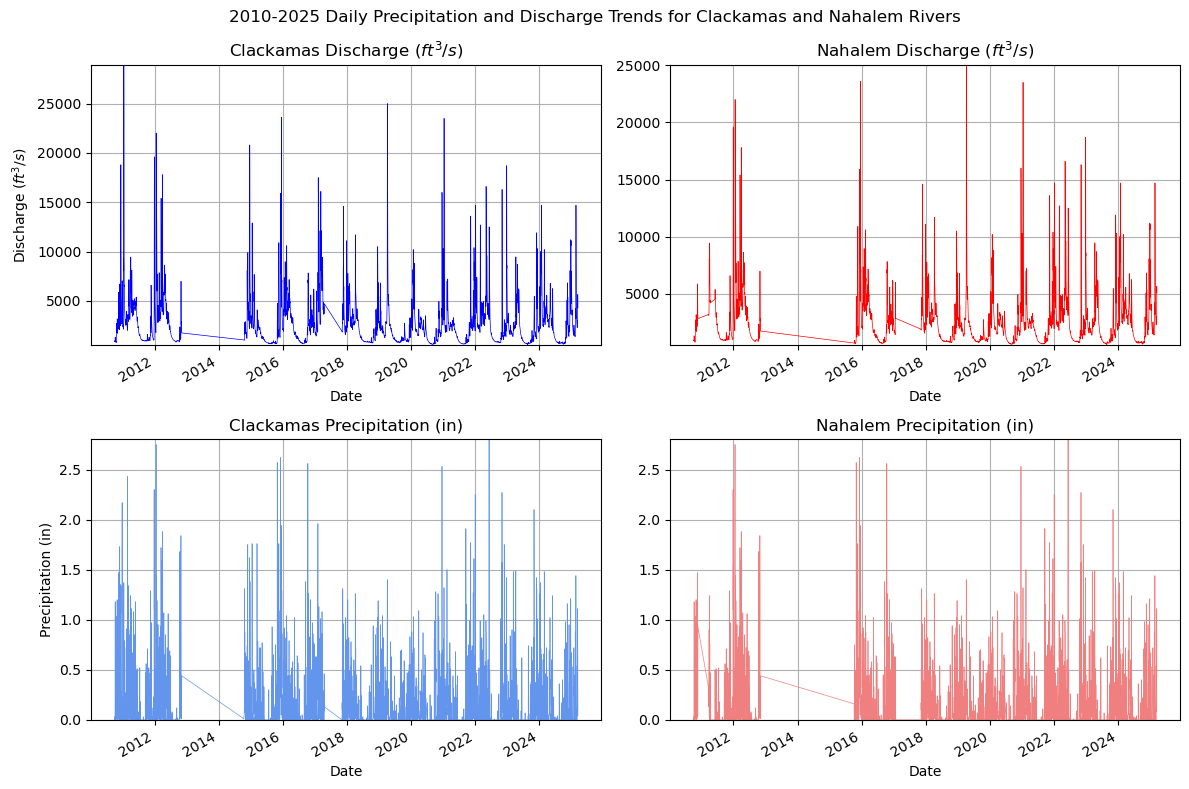

In [112]:
# Create the figure for the subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# Create variables for the different station data where the index are dates
c_discharge = new_df_c.set_index("Date")["Discharge (ft3/s)"]
c_precipitation = new_df_c.set_index("Date")["Precipitation (in)"]
n_discharge = new_df_n.set_index("Date")["Discharge (ft3/s)"]
n_precipitation = new_df_n.set_index("Date")["Precipitation (in)"]

# Plot each set of data in its own subplot
c_discharge.plot(
    ax=axs[0][0], c="blue", lw=0.5, ylim=[c_discharge.min()-50, c_discharge.max()+50], grid=True
    )
c_precipitation.plot(
    ax=axs[1][0], c="cornflowerblue", lw=0.5, ylim=[c_precipitation.min(), c_precipitation.max()], grid=True
    )
n_discharge.plot(
    ax=axs[0][1], c="red", lw=0.5, ylim=[n_discharge.min()-50, n_discharge.max()+50], grid=True
    )
n_precipitation.plot(
    ax=axs[1][1], c="lightcoral", lw=0.5, ylim=[n_precipitation.min(), n_precipitation.max()], grid=True
    )

# Set figure and plot titles
fig.suptitle("2010-2025 Daily Precipitation and Discharge Trends for Clackamas and Nahalem Rivers")
axs[0][0].set_title(r"Clackamas Discharge $(ft^3/s)$")
axs[1][0].set_title("Clackamas Precipitation (in)")
axs[0][1].set_title(r"Nahalem Discharge $(ft^3/s)$")
axs[1][1].set_title("Nahalem Precipitation (in)")

# Axis labels
axs[0][0].set_ylabel(r"Discharge $(ft^3/s)$")
axs[1][0].set_ylabel("Precipitation (in)")

# Fix the layout so that the x-axis labels so they don't overlap
plt.tight_layout()

From these subplots, we can see that the NaN data that we cleaned out was mostly around 2013 and 2015. Despite this missing data, most of the rest of the data remains continuous and helpful for analysis. We can see there is a cyclical pattern to both the discharge and the precipitation. This is to be expected since the water cycle is just that- cyclical. Just from looking at the graphs, it appears as though there is no overarching trends of increasing or decreasing overall discharge or precipitation. To get a better idea of whether or not there are overarching trends, it might be beneficial to look at weekly averages.

In [187]:
# Make a copy of the working dataframe
df_copy_c = new_df_c.copy()

# Extract the week from the datetime column using isocalendar
df_copy_c['week'] = df_copy_c['Date'].dt.isocalendar().week
df_copy_c['year'] = df_copy_c['Date'].dt.year
df_copy_c['yr-wk'] = pd.to_datetime(df_copy_c['year'].astype(str) + df_copy_c['week'].astype(str) + '0', format='%Y%U%w')

# Group by 'yr-wk' and calculate the mean for each group (discharge and precipitation)
weekly_avg_c = df_copy_c.groupby('yr-wk')[['Discharge (ft3/s)', 'Precipitation (in)']].mean().reset_index()

# Rename the columns
weekly_avg_c = weekly_avg_c.rename(
    columns={
        "yr-wk":"Year/Week", 
        "Discharge (ft3/s)":"Weekly Avg Discharge", 
        "Precipitation (in)":"Weekly Avg Precipitation"
    })

weekly_avg_c

,Year/Week,Weekly Avg Discharge,Weekly Avg Precipitation
0,2010-09-26,925.000000,0.010000
1,2010-10-03,996.571429,0.277143
2,2010-10-10,970.571429,0.011429
3,2010-10-17,1012.714286,0.212857
4,2010-10-24,2154.285714,0.367143
...,...,...,...
622,2025-02-23,4644.285714,0.521429
623,2025-03-02,7152.857143,0.148571
624,2025-03-09,2791.428571,0.037143
625,2025-03-16,3084.285714,0.521429


In [198]:
# Make a copy of the working dataframe
df_copy_n = new_df_n.copy()

# Extract the week from the datetime column using isocalendar
df_copy_n['week'] = df_copy_n['Date'].dt.isocalendar().week
df_copy_n['year'] = df_copy_n['Date'].dt.year
df_copy_n['yr-wk'] = pd.to_datetime(df_copy_n['year'].astype(str) + df_copy_n['week'].astype(str) + '0', format='%Y%U%w')

# Group by 'yr-wk' and calculate the mean for each group (discharge and precipitation)
weekly_avg_n = df_copy_n.groupby('yr-wk')[['Discharge (ft3/s)', 'Precipitation (in)']].mean().reset_index()

# Rename the columns
weekly_avg_n = weekly_avg_n.rename(
    columns={
        "yr-wk":"Year/Week", 
        "Discharge (ft3/s)":"Weekly Avg Discharge", 
        "Precipitation (in)":"Weekly Avg Precipitation"
    })

weekly_avg_n

,Year/Week,Weekly Avg Discharge,Weekly Avg Precipitation
0,2010-09-26,9.57,0.0
1,2010-10-03,11.455714,0.075714
2,2010-10-10,12.74,0.0
3,2010-10-17,20.418571,0.285714
4,2010-10-24,114.071429,0.34
...,...,...,...
749,2025-02-23,493.0,0.354286
750,2025-03-02,1043.285714,0.274286
751,2025-03-09,269.714286,0.074286
752,2025-03-16,261.857143,0.295714


Now we graph the weekly averages in the same way as we did previously for the daily data.

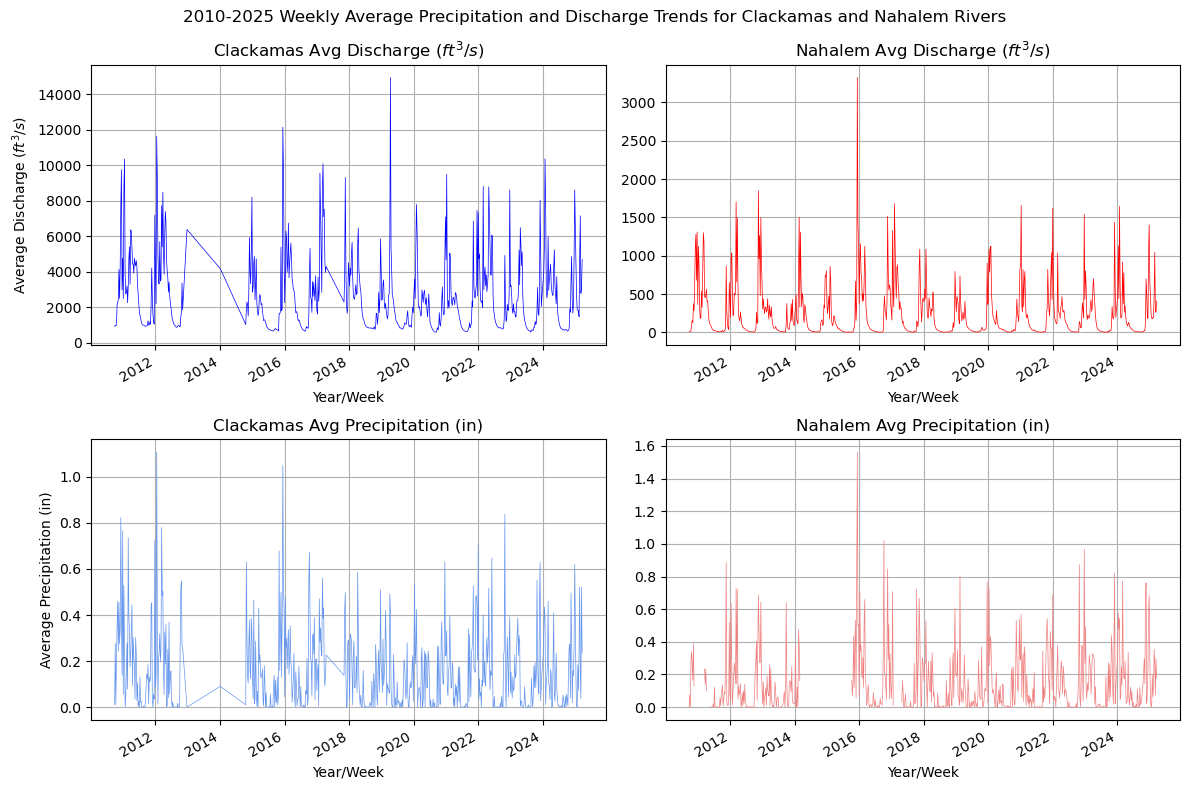

In [199]:
# Create the figure for the subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# Create variables for the different station data where the index are dates
c_discharge_avg = weekly_avg_c.set_index("Year/Week")["Weekly Avg Discharge"]
c_precipitation_avg = weekly_avg_c.set_index("Year/Week")["Weekly Avg Precipitation"]
n_discharge_avg = weekly_avg_n.set_index("Year/Week")["Weekly Avg Discharge"]
n_precipitation_avg = weekly_avg_n.set_index("Year/Week")["Weekly Avg Precipitation"]

# Plot each set of data in its own subplot
c_discharge_avg.plot(ax=axs[0][0], c="blue", lw=0.5, grid=True)
c_precipitation_avg.plot(ax=axs[1][0], c="cornflowerblue", lw=0.5, grid=True)
n_discharge_avg.plot(ax=axs[0][1], c="red", lw=0.5, grid=True)
n_precipitation_avg.plot(ax=axs[1][1], c="lightcoral", lw=0.5, grid=True)

# Set figure and plot titles
fig.suptitle("2010-2025 Weekly Average Precipitation and Discharge Trends for Clackamas and Nahalem Rivers")
axs[0][0].set_title(r"Clackamas Avg Discharge $(ft^3/s)$")
axs[1][0].set_title("Clackamas Avg Precipitation (in)")
axs[0][1].set_title(r"Nahalem Avg Discharge $(ft^3/s)$")
axs[1][1].set_title("Nahalem Avg Precipitation (in)")

# Axis labels
axs[0][0].set_ylabel(r"Average Discharge $(ft^3/s)$")
axs[1][0].set_ylabel("Average Precipitation (in)")

# Fix the layout so that the x-axis labels so they don't overlap
plt.tight_layout()

These grapghs are slightly less noisey, however it is still had to discerne larger trends. Based on visual observation, we can see that the cyclic rise and fall are still preserved. We can see a relationship between both the discharge and precipitation graphs for both rivers in that when one rises, the other does too and vice versa. Just based on the water cycle, the precipitation is likely the causal driver for the rise in river discharge.

Unfortunately, the range of data that is available for both of these parameters are too narrow. To see if there is an increase or decrease of precipitation and thus river discharge over time, we would need data that goes back much longer than just 15 years. With such a small time frame as 15 yaers, it would be hard to determine whether or not increases in precipitation are attibuted to normal weather patterns, and even those on a slightly longer cycle like that of the la nina and el nino.

Because of this, the exploration done above is inconclusive and will need much more robust data sets to explore. To further explore this question, we could look at surface water velocity and see how that has changed over time, it might be more informative about how changed in runoff velocity could contribute to seasons of greater transport of plastics and other waste into the oceans thus contributing to a cyclical rate of pollution entering the oceans from inland.

We might also take a look at the distribution of values for discharge and precipitation to see if the data is skewed in any direction.

C:\Users\nadka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nadka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


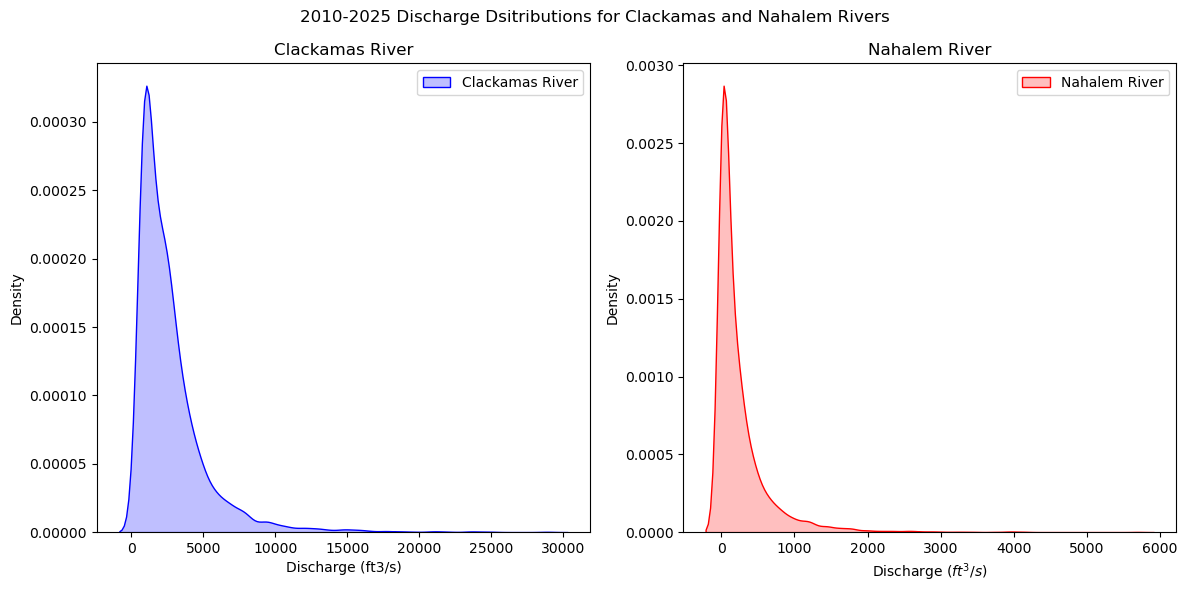

In [221]:
# Import Seaborn
import seaborn as sns

# Create a 1 row, 2 column subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot the distribution of Discharge for Clackamas River
sns.kdeplot(data=new_df_c["Discharge (ft3/s)"], fill=True, label="Clackamas River", color='blue', ax=axes[0])
axes[0].set_title("Clackamas River")
axes[1].set_xlabel(r"Discharge $(ft^3/s)$")
axes[0].legend()

# Plot the distribution of Discharge for Nahalem River
sns.kdeplot(data=new_df_n["Discharge (ft3/s)"], fill=True, label="Nahalem River", color='red', ax=axes[1])
axes[1].set_title("Nahalem River")
axes[1].set_xlabel(r"Discharge $(ft^3/s)$")
axes[1].legend()

# Plot Title
fig.suptitle("2010-2025 Discharge Dsitributions for Clackamas and Nahalem Rivers")

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\nadka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nadka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


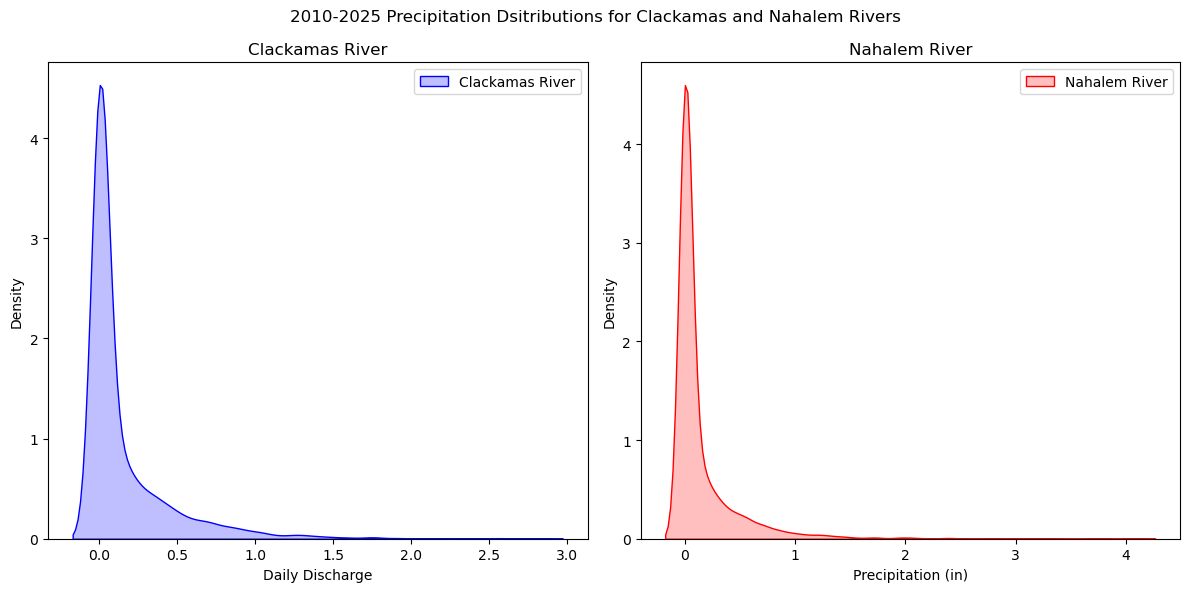

In [222]:
# Create a 1 row, 2 column subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot the distribution of Discharge for Clackamas River
sns.kdeplot(data=new_df_c["Precipitation (in)"], fill=True, label="Clackamas River", color='blue', ax=axes[0])
axes[0].set_title("Clackamas River")
axes[0].set_xlabel("Daily Discharge")
axes[0].legend()

# Plot the distribution of Discharge for Nahalem River
sns.kdeplot(data=new_df_n["Precipitation (in)"], fill=True, label="Nahalem River", color='red', ax=axes[1])
axes[1].set_title("Nahalem River")
axes[1].set_xlabel("Precipitation (in)")
axes[1].legend()

# Plot Title
fig.suptitle("2010-2025 Precipitation Dsitributions for Clackamas and Nahalem Rivers")

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Both figures for discharge and precipitation appear to be skewed right. This is because there are some higher value outliers that is pulling the ditribution to the right. This could be explained as abnormaly large precipitation or discharge values being recorded which might be indicitive of climate change. The cause of these larger values is hard to determine from the data that we have, as these larger values could be from normal weather fluctuations. 